In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

df = pd.read_csv("processed_food_delivery.csv")
print(df.head())

   Unnamed: 0  Age  Gender  Marital Status  Occupation  Monthly Income  \
0           0   20       1               1           0               0   
1           1   24       1               1           0               1   
2           2   22       0               1           0               1   
3           3   22       1               1           0               0   
4           4   22       0               1           0               1   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

   Output  
0       1  
1       1  
2       1  
3       1  
4       1  


In [2]:

X = df.drop('Output',axis=1)
y = df['Output']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=50)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 11)
Shape of test dataset :  (78, 11)


Score:  0.7692307692307693
Recall:  0.819672131147541
Precision:  0.8771929824561403
Accuracy:  0.7692307692307693
F1 Score:  0.8474576271186439
Confusion Matrix: 
[[10 11]
 [ 7 50]]


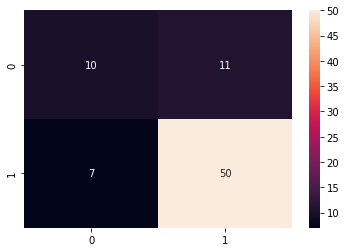

In [3]:
#1. Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Score: ", gnb.score(X_test, y_test))
y_pred = gnb.predict(X_test)
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True);

Score:  0.6538461538461539
Recall:  0.7966101694915254
Precision:  0.7580645161290323
Accuracy:  0.6538461538461539
F1 Score:  0.7768595041322315
Confusion Matrix: 
[[ 4 12]
 [15 47]]


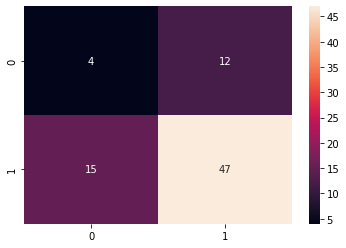

In [4]:
#2. KNN n nearest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("Score: ", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True);

Score:  0.7564102564102564
Recall:  1.0
Precision:  0.7564102564102564
Accuracy:  0.7564102564102564
F1 Score:  0.8613138686131386
Confusion Matrix: 
[[ 0  0]
 [19 59]]


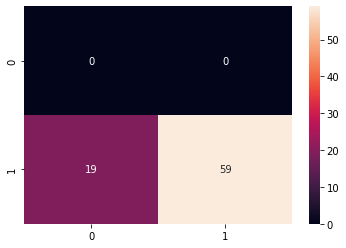

In [5]:
#3. Support vector
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True);

Score 0.8762886597938144
Recall:  0.9605263157894737
Precision:  0.8902439024390244
Accuracy:  0.8762886597938144
F1 Score:  0.9240506329113923
Confusion Matrix: 
[[12  3]
 [ 9 73]]


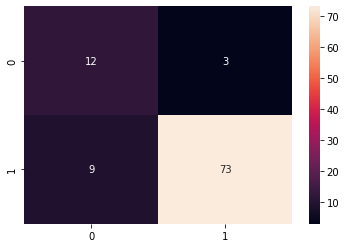

In [6]:
#4. Decision Tree with entropy
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Score", clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True);

Score:  0.865979381443299
Recall:  0.9210526315789473
Precision:  0.9090909090909091
Accuracy:  0.865979381443299
F1 Score:  0.915032679738562
Confusion Matrix: 
[[14  6]
 [ 7 70]]


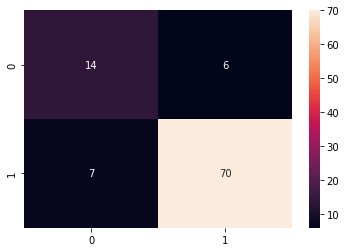

In [7]:
#5. Decision Tree with gini
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Score: ", clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True);

Score:  0.845360824742268
Recall:  0.9473684210526315
Precision:  0.8674698795180723
Accuracy:  0.845360824742268
F1 Score:  0.9056603773584905
Confusion Matrix: 
[[10  4]
 [11 72]]


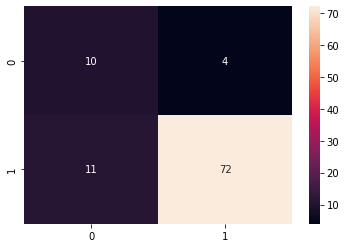

In [8]:
#6. Random Forest
rfc = RandomForestClassifier(n_estimators=750)

rfc.fit(X_train, y_train)

print("Score: ", rfc.score(X_test, y_test))
y_pred = rfc.predict(X_test)
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True);